In [16]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import json
import pandas as pd
import matplotlib.pyplot as plt

class BaseData:
    def __init__(self, x, y, shift=False):
        self.x = x
        self.y = y
        order = np.argsort(x)
        self.x = x[order]
        self.y = y[order]
        if shift:
            self.y -= np.mean(self.y[:3])
    
    def __repr__(self):
        return f"BD(x={self.x}, y={self.y})"

class LillianData:
    def __init__(self, path, shift=False):
        self.load_data(path, shift)
    
    def load_data(self, path, shift=False):
        df_raw = pd.read_csv(path)
        i = 0
        while i < len(df_raw.keys()):
            key = df_raw.keys()[i]
            next_key = df_raw.keys()[i + 1]
            x = df_raw[key].values[1:].astype(float)
            y = df_raw[next_key].values[1:].astype(float)
            mask = ~np.isnan(x) & ~np.isnan(y)
            setattr(self, key, BaseData(
                x[mask],
                y[mask],
                shift=shift,
            ))
            i += 2
    
    def __getitem__(self, key):
        return getattr(self, key)

    def keys(self):
        return [key for key in self.__dict__.keys() if not key.startswith('_')]
    
    def __repr__(self):
        return f"LD(keys={self.keys()})"


root = '/home/mmccraw/dev/data/09-30-25/lillian-data-manual/'

g_r_smooth = LillianData(os.path.join(root, 'lillian_smooth_gr.csv'), shift=True)
smooth_phi = 0.3, 0.35, 0.4, 0.45, 0.5, 0.55
g_r_rough = LillianData(os.path.join(root, 'lillian_rough_gr.csv'), shift=True)
rough_phi = 0.3, 0.35, 0.4, 0.45, 0.487, 0.535

# smooth - red
# rough - blue
diffusion_slope = LillianData(os.path.join(root, 'lillian_diffusion_slope.csv'))
diffusion_coef = LillianData(os.path.join(root, 'lillian_diffusion_coefs.csv'))

# phi 0.02
translational_diffusion_dilute = LillianData(os.path.join(root, 'lillian_translational_diffusion_dilute.csv'))
rotational_diffusion_dilute = LillianData(os.path.join(root, 'lillian_rotational_diffusion_dilute.csv'))

translational_diffusion_smooth = LillianData(os.path.join(root, 'lillian_translational_diffusion_smooth.csv'))
td_smooth_phi = [0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.02]
rotational_diffusion_smooth = LillianData(os.path.join(root, 'lillian_rotational_diffusion_smooth.csv'))
rd_smooth_phi = [0.02, 0.35, 0.5, 0.4, 0.45, 0.55, 0.3]
translational_diffusion_rough = LillianData(os.path.join(root, 'lillian_translational_diffusion_rough.csv'))
td_rough_phi = [0.535, 0.5, 0.45, 0.4, 0.35, 0.3, 0.02]
rotational_diffusion_rough = LillianData(os.path.join(root, 'lillian_rotational_diffusion_rough.csv'))
rd_rough_phi = [0.02, 0.535, 0.52, 0.5, 0.45, 0.35, 0.4, 0.3]  # the pink curve phi is made up.  the phi label is not in the paper.

phi_norm = plt.Normalize(vmin=min(smooth_phi), vmax=max(smooth_phi))
cmap = plt.cm.viridis

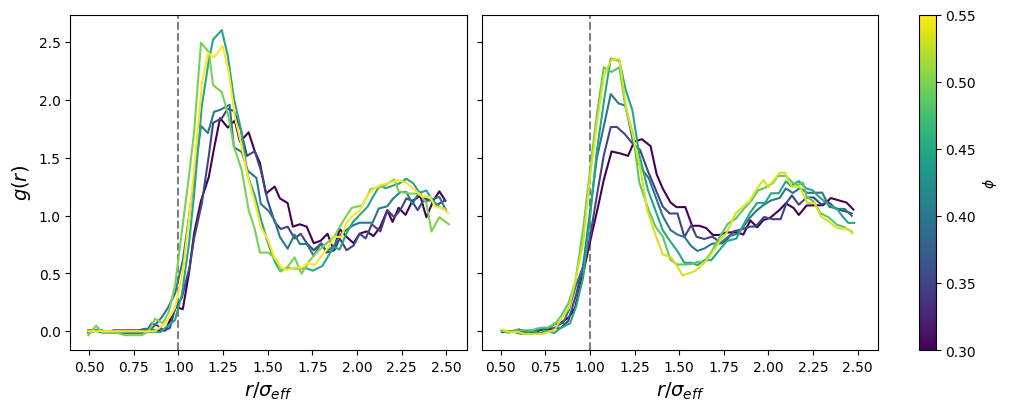

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True, sharex=True, constrained_layout=True)
for i, k in enumerate(g_r_smooth.keys()):
    ax[0].plot(g_r_smooth[k].x, g_r_smooth[k].y, c=cmap(phi_norm(smooth_phi[i])))
for i, k in enumerate(g_r_rough.keys()):
    ax[1].plot(g_r_rough[k].x, g_r_rough[k].y, c=cmap(phi_norm(rough_phi[i])))
for a in ax:
    a.axvline(1, color='k', linestyle='--', zorder=0, alpha=0.5)
    a.set_xlabel(r'$r/\sigma_{eff}$', fontsize=14)
ax[0].set_ylabel(r'$g(r)$', fontsize=14)
sm = plt.cm.ScalarMappable(norm=phi_norm, cmap=cmap)
sm.set_array(smooth_phi)
cbar = plt.colorbar(sm, ax=ax, label=r'$\phi$')
plt.show()

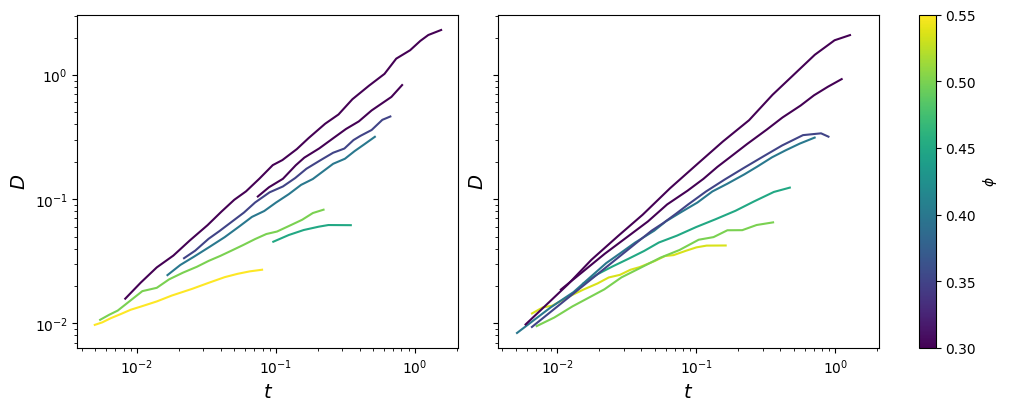

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True, sharex=True, constrained_layout=True)
for i, k in enumerate(translational_diffusion_smooth.keys()):
    ax[0].plot(translational_diffusion_smooth[k].x, translational_diffusion_smooth[k].y, c=cmap(phi_norm(td_smooth_phi[i])))
ax[0].set_xlabel(r'$t$', fontsize=14)
ax[0].set_ylabel(r'$D$', fontsize=14)
for i, k in enumerate(translational_diffusion_rough.keys()):
    ax[1].plot(translational_diffusion_rough[k].x, translational_diffusion_rough[k].y, c=cmap(phi_norm(td_rough_phi[i])))
ax[1].set_xlabel(r'$t$', fontsize=14)
ax[1].set_ylabel(r'$D$', fontsize=14)
sm = plt.cm.ScalarMappable(norm=phi_norm, cmap=cmap)
sm.set_array(td_rough_phi)
cbar = plt.colorbar(sm, ax=ax, label=r'$\phi$')
plt.xscale('log')
plt.yscale('log')
plt.show()

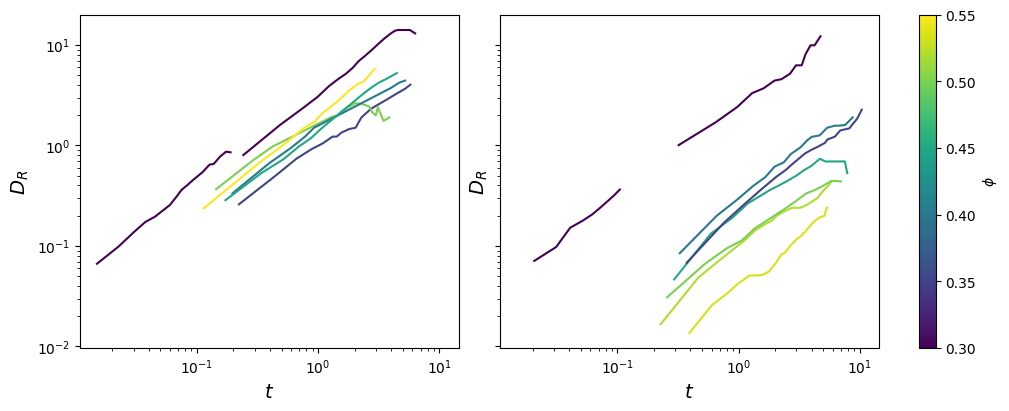

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True, sharex=True, constrained_layout=True)
for i, k in enumerate(rotational_diffusion_smooth.keys()):
    ax[0].plot(rotational_diffusion_smooth[k].x, rotational_diffusion_smooth[k].y, c=cmap(phi_norm(rd_smooth_phi[i])))
ax[0].set_xlabel(r'$t$', fontsize=14)
ax[0].set_ylabel(r'$D_R$', fontsize=14)
for i, k in enumerate(rotational_diffusion_rough.keys()):
    ax[1].plot(rotational_diffusion_rough[k].x, rotational_diffusion_rough[k].y, c=cmap(phi_norm(rd_rough_phi[i])))
ax[1].set_xlabel(r'$t$', fontsize=14)
ax[1].set_ylabel(r'$D_R$', fontsize=14)
sm = plt.cm.ScalarMappable(norm=phi_norm, cmap=cmap)
sm.set_array(rd_rough_phi)
cbar = plt.colorbar(sm, ax=ax, label=r'$\phi$')
plt.xscale('log')
plt.yscale('log')
plt.show()